In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)


In [58]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [59]:
miss = train.isnull().sum()/len(train)
miss = miss[miss>0]
miss.sort_values(inplace=True)

In [60]:
miss_frame = miss.to_frame()
miss_frame.columns = ['count']
miss_frame.index.names = ['Name']
miss_frame['Name'] = miss.index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

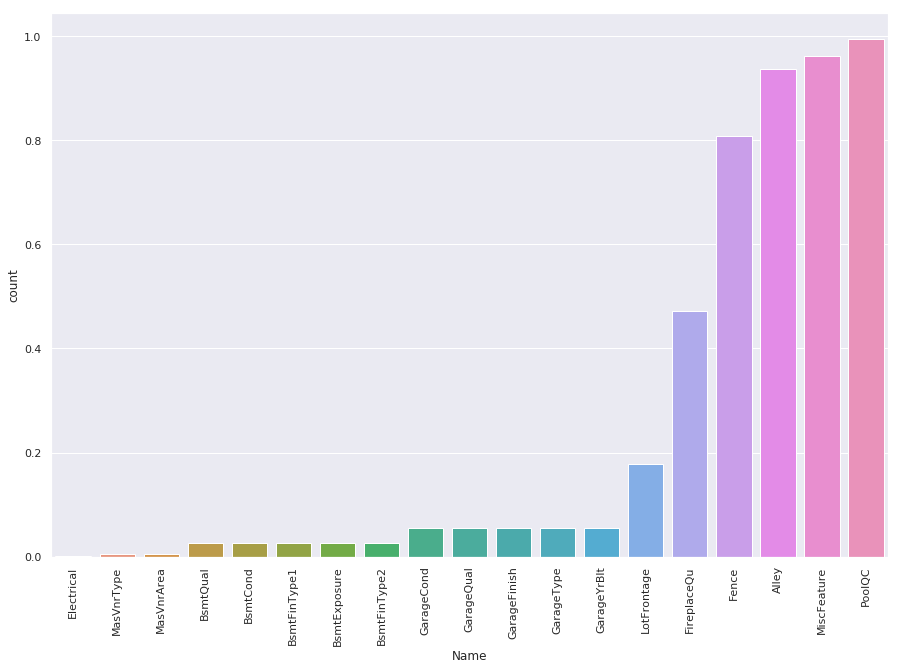

In [61]:
sns.set(style='darkgrid', color_codes=True)
sns.barplot(x='Name', y='count', data=miss_frame)
plt.xticks(rotation=90)

The skewness of SalePrice is 1.8828757597682129


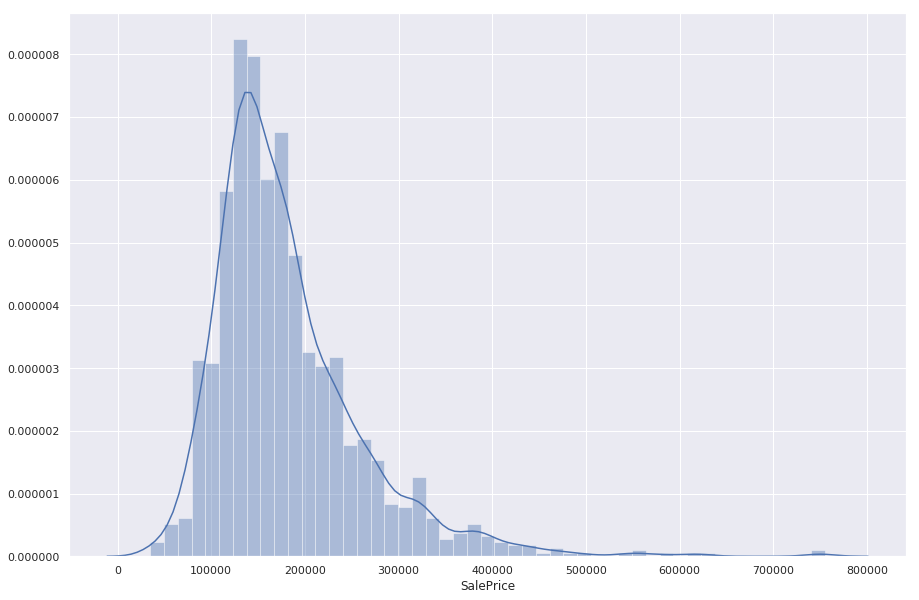

In [62]:
print ("The skewness of SalePrice is {}".format(train['SalePrice'].skew()))
sns.distplot(train['SalePrice'])


Skewness is  0.12133506220520406


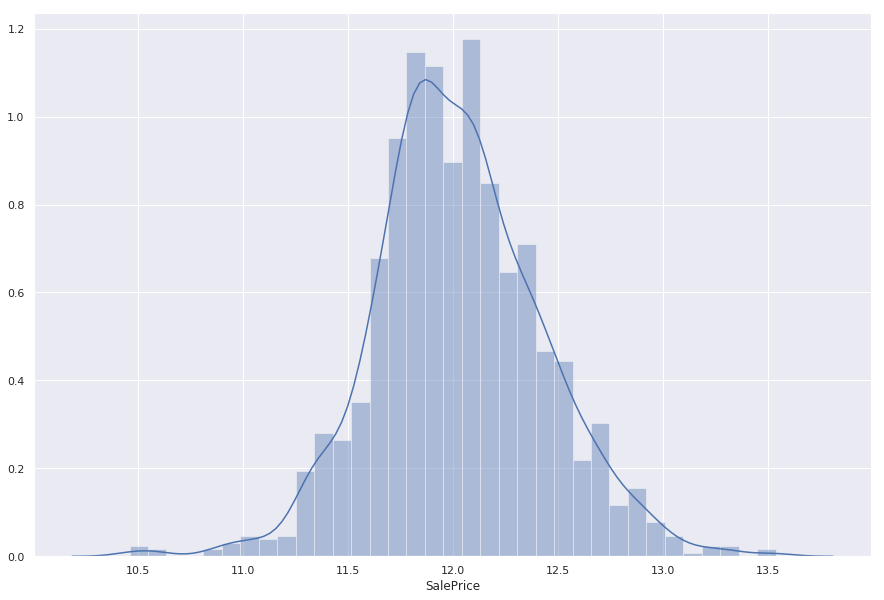

In [63]:
target = np.log(train['SalePrice'])
print('Skewness is ', target.skew())
sns.distplot(target)

In [64]:
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
print('There are {} numeric and {} categorical columns in the dataset'.format(numeric_data.shape[1],cat_data.shape[1]) )

There are 38 numeric and 43 categorical columns in the dataset


In [65]:
del numeric_data['Id']

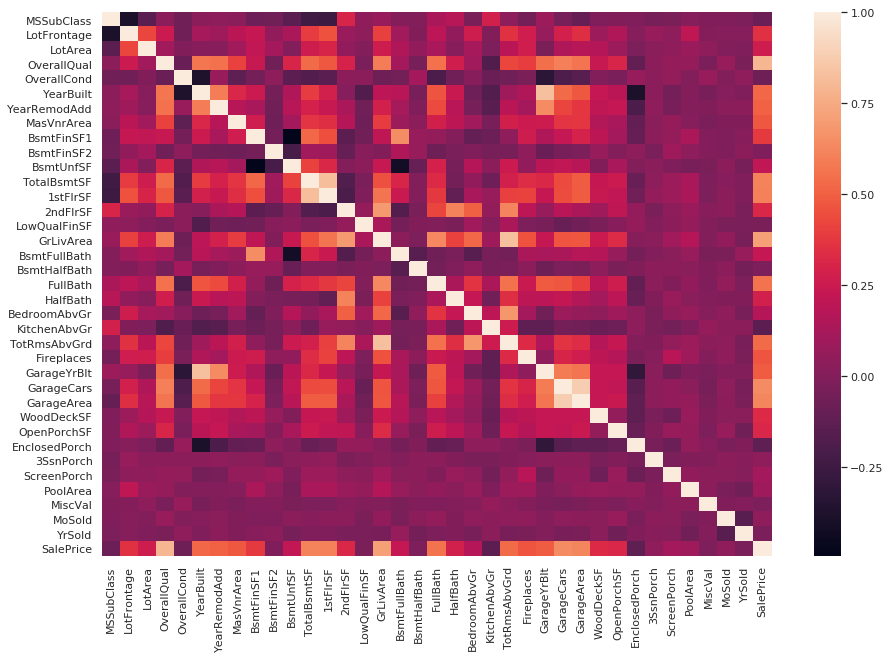

In [67]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [71]:
print(corr['SalePrice'].sort_values(ascending=False)[:15])
print('-'*20)
print(corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64
--------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [72]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [76]:
pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
pivot.sort_values(by='OverallQual')

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


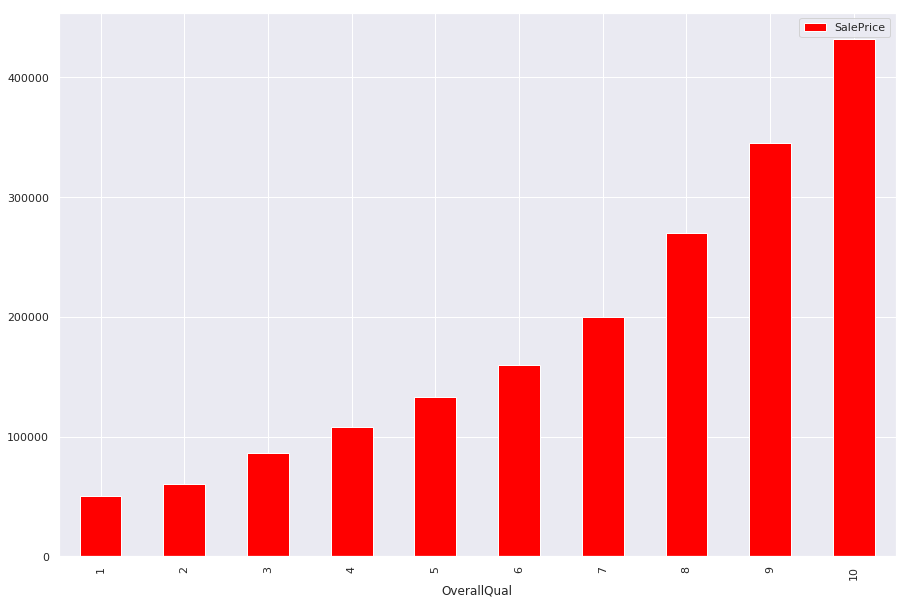

In [78]:
pivot.plot(kind='bar', color='red')